In [2]:
!pip install pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------- ----------------- 6.3/11.1 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 42.6 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   -----------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('solar_energy_worldwide.csv')

In [9]:
print("Pierwsze 5 wierszy danych:")
print(df.head(5))

Pierwsze 5 wierszy danych:
          City        Country  Latitude  Longitude  Annual_Sunlight_Hours  \
0     New York  United States     40.71     -74.01                   2500   
1  Los Angeles  United States     34.05    -118.24                   3200   
2        Miami  United States     25.76     -80.19                   3000   
3      Phoenix  United States     33.45    -112.07                   3800   
4      Chicago  United States     41.88     -87.63                   2300   

   Daily_Peak_Sun_Hours  GHI_kWh_per_m2  Electricity_Price_USD_per_kWh  \
0                   6.8             4.5                           0.15   
1                   8.8             5.8                           0.15   
2                   8.2             5.3                           0.15   
3                  10.4             6.5                           0.15   
4                   6.3             4.2                           0.15   

   Solar_Installations_Count  Avg_System_Cost_USD  Avg_Annual_Pro

In [11]:
#analiza cen prądu i instalacji

In [14]:
print("analiza Cen Prądu (USD/kWh)")
df['Electricity_Price_USD_per_kWh'].describe()

analiza Cen Prądu (USD/kWh)


count    48.00
mean      0.15
std       0.00
min       0.15
25%       0.15
50%       0.15
75%       0.15
max       0.15
Name: Electricity_Price_USD_per_kWh, dtype: float64

In [15]:
print("\n Analiza Kosztu Instalacji (USD)")
print(df['Avg_System_Cost_USD'].describe())


 Analiza Kosztu Instalacji (USD)
count       48.0
mean     15000.0
std          0.0
min      15000.0
25%      15000.0
50%      15000.0
75%      15000.0
max      15000.0
Name: Avg_System_Cost_USD, dtype: float64


In [17]:
# aktualiazacja cen,  mnożniki

In [20]:
#mnożniki rynkowe
# klucz to Region, wartości to: (mnożnik ceny prądu, mnożnik kosztu instalacji)
market_factors = {
    'Europe':        (2.2, 1.3),  # Prąd 2.2x droższy, instalacja 1.3x droższa
    'North America': (1.0, 1.0),  # Baza (USA) - bez zmian
    'South America': (0.8, 0.7),  # Tani prąd, tania robocizna
    'Asia':          (0.9, 0.6),  
    'Africa':        (0.7, 0.6), 
    'Oceania':       (1.8, 1.1),
    'Middle East':   (0.4, 0.8)
}

In [21]:
def adjust_market_data(row):
    factors = market_factors.get(row['Region'], (1.0, 1.0))
    real_price = 0.15 * factors[0]
    real_cost = 15000 * factors[1]
    real_savings = row['Avg_Annual_Production_kWh'] * real_price
    real_roi = (real_savings / real_cost) * 100
    return pd.Series([real_price, real_cost, real_roi])

In [22]:
#nowe kolumny w tabeli
df[['Real_Elec_Price', 'Real_System_Cost', 'Real_ROI']] = df.apply(adjust_market_data, axis=1)

In [23]:
cols_to_show = ['City', 'Region', 'Real_Elec_Price', 'Real_System_Cost', 'Real_ROI']

In [24]:
display(df[cols_to_show].sample(5))

,City,Region,Real_Elec_Price,Real_System_Cost,Real_ROI
15,Toronto,North America,0.150,15000.0,9.450000
8,Manchester,Europe,0.330,19500.0,11.042308
25,Mumbai,Asia,0.135,9000.0,18.900000
14,Barcelona,Europe,0.330,19500.0,20.561538
37,Athens,Europe,0.330,19500.0,22.084615


In [25]:
sns.set_style("whitegrid")

In [26]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [27]:
top_cities = df.sort_values(by='Real_ROI', ascending=False).head(15)

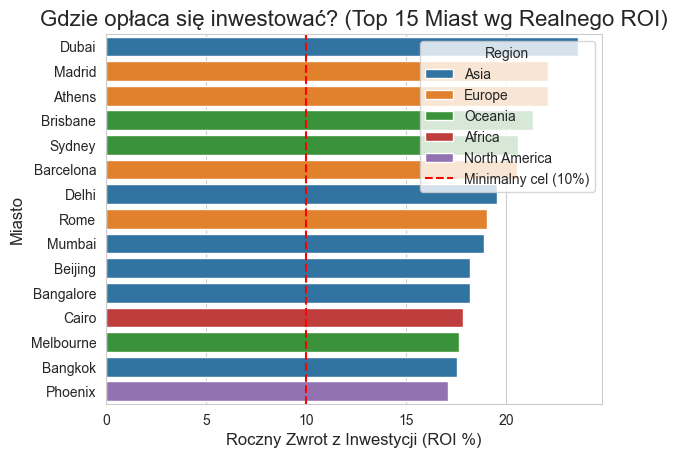

In [39]:
sns.barplot(data=top_cities, x='Real_ROI', y='City', hue='Region', dodge=False)

plt.title('Gdzie opłaca się inwestować? (Top 15 Miast wg Realnego ROI)', fontsize=16)
plt.xlabel('Roczny Zwrot z Inwestycji (ROI %)', fontsize=12)
plt.ylabel('Miasto', fontsize=12)

plt.axvline(x=10, color='red', linestyle='--', label='Minimalny cel (10%)')
plt.legend(title='Region')

plt.show()


In [32]:
df.to_csv('solar_enriched.csv', index=False)